# Import Libraries

The below block imports all needed libraries. Feel free to add additional libraries that you need and rerun below block.

Two last lines inform you of the Pytorch version and the availability of GPU.
The last line should print `GPU availability: True`.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
import torch.optim as optim
from torch.utils.data import Dataset
import torchvision.transforms as transforms

print('Pytorch version: ', torch.__version__)
print('GPU availability: ', torch.cuda.is_available())

Pytorch version:  1.12.1+cu113
GPU availability:  True


In [22]:
from timeit import default_timer as timer
from datetime import timedelta

# Download Dataset
If you are familiar with Linux bash scripts, you can put `!` at the beginning of a command to order Colab of interpreting it as bash scripts instead of python scripts.

The below block downloads MNIST dataset and decompresses it.

In [2]:
!wget https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz
!tar xzf mnist_png.tar.gz

--2022-10-03 22:56:57--  https://github.com/myleott/mnist_png/raw/master/mnist_png.tar.gz
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/myleott/mnist_png/master/mnist_png.tar.gz [following]
--2022-10-03 22:56:57--  https://raw.githubusercontent.com/myleott/mnist_png/master/mnist_png.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15683414 (15M) [application/octet-stream]
Saving to: ‘mnist_png.tar.gz’

mnist_png.tar.gz    100%[===================>]  14.96M  --.-KB/s    in 0.04s   

2022-10-03 22:56:58 (412 MB/s) - ‘mnist_png.tar.gz’ saved [15683414/15683414]



# Define Dataset Class

In order to use a dataset, we need to design a pytorch Dataset Class to process it.
In the block below, you are required to complete: 

* **TODO 1**: `def __init__(root, transform)` function to build the MNIST dataset from images included in the `root` directory. Please add code below `TODO1` to complete this function. The dataset should be captured by two lists, i.e., `self.images` that contains all images of MNIST, and `self.labels` that contains the corresponding label of each image in `self.images`.
* **TODO 2**: `def __getitem__(index)` to draw a sample at `index` and its corresponding label. This function should return a tuple (X, y), where X is the image (numpy ndarray of shape 1x28x28) and y is a scalar from 0 to 9 representing X's label.

**TODO 1 and TODO 2**

In [3]:
# Define Dataset:
class MNISTDataset(Dataset):
    def __init__(self, root, transform=None):
        # `root` is expected to contain 10 sub-directories, each of which is named after the label of all images included inside.
        # transform is a Torchvision.Transforms object that pre-processes an image 
        self.root = root
        self.transform = transform
        #TODO 1: Read dataset.
        # All images should be contained in a list `self.images`, and their corresponding labels in a list `self.labels`
        # `self.images[i]` should contain a numpy ndarrays of size 1x28x28.
        # `self.labels[i]` should contain a single integer of [0-9] representing the label of `self.images[i]`.
        self.images = list()
        self.labels = list()
        
        for folder in os.listdir(self.root):#iterating in testing or training directories
          for image in os.listdir(self.root+"/"+folder): #iterating in internal folders
            #print("Folder: "+folder+" has: "+dir+"/"+data+"/"+folder+"/"+image)
            path = self.root+"/"+folder+"/"+image
            #img = read_image(path)
            img = Image.open(path)
            self.images.append(img)
            self.labels.append(int(folder))

    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, index):
        # TODO2: retrieve `self.images[index]` and feed the image into self.transform.
        # Then, return a tuple (X, y), where X is the image and y is its label.
        image = self.images[index]
        image = self.transform(image)
        label = self.labels[index]
        data_sample = (image, label)
        return data_sample

    def show_random(self):
        indices = np.random.randint(0, len(self), [16,])
        f, ax = plt.subplots(4, 4, figsize=(10, 10))
        for i in range(4):
            for j in range(4):
                ax[i, j].imshow(self.images[indices[i * 4 + j]])
                ax[i, j].tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)
                ax[i, j].set_title(f'Label: {self.labels[indices[i * 4 + j]]}')
        plt.show()

In [ ]:
################################################################
#Testing if images loaded successfully
################################################################
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
view_features = MNISTDataset('mnist_png/training', transform=transform)
view_features.images
#print(view_features.labels)

[<PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F4636613F90>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365EF8D0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365EFE90>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6550>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6B50>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6CD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6C50>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6D50>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6DD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6BD0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6ED0>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7F46365F6E50>,
 <PIL.PngImagePlugin.PngImageFile image mode=L size=28x28 at 0x7

In [ ]:
################################################################
#Testing __getitem__(self, index) function
################################################################
data_sample = view_features.__getitem__(30)
image, label = data_sample
print("Image is \n", image)
print("Label is: ", label)

Image is 
 tensor([[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, 

# Define Model Class
Below, we define a simple Multi-layer Perceptron Network with a hidden layer.
A pytorch model necessarily have two functions, i.e., `__init__`, which defines all layers of the network, and `forward`, which is fed the input data and processes through all layers defined in `__init__`.

In [24]:
# Define Network:
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(256, 10)
    def forward(self, x):
        x = x.view(-1, 28*28) # Flatten every image into a single vector
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def name(self):
        return "MLP"

# Create MNISTDataset objects and dataloaders 
Below, we create the objects to process training and testing sets of MNIST data.
As there are no held-out validation set, we manually split the training set into training and validation subsets with the ratio of 8:2.

After creating dataset objects, we wrap them by a Pytorch Dataloader to allow several necessary features in training deep learning models, e.g., mini-batch feeding, shuffling.

***Note***: if you successfully complete `__init__` function of `MNISTDataset`, its `show_random` function would successfully randomly show 16 images and corresponding labels in the dataset.

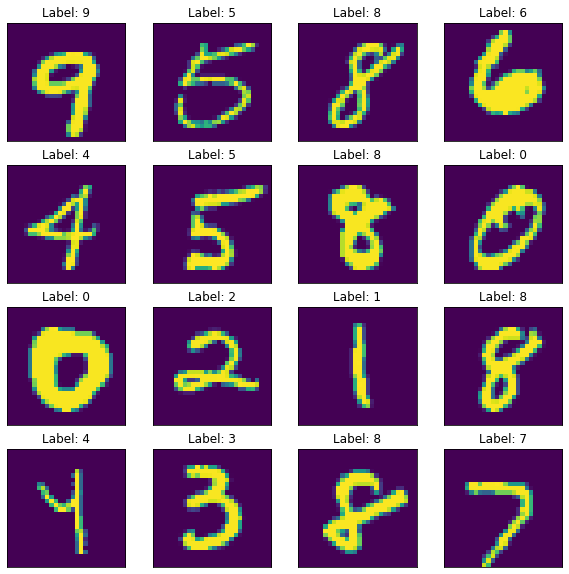

Training set size:  48000
Validation set size:  12000
Testing set size:  10000


In [25]:
################################################################
# Hyper parameters
################################################################
BATCH_SIZE = 128
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

################################################################
# Create training and testing dataset and show random examples
################################################################
trainval_set = MNISTDataset('mnist_png/training', transform=transform)
trainval_set.show_random()

test_set = MNISTDataset('mnist_png/testing', transform=transform)

################################################################
# As there is no validation set
# We split training dataset into training and validation sets
################################################################
train_size = int(0.8 * len(trainval_set))
val_size = len(trainval_set) - train_size
train_set, val_set = torch.utils.data.random_split(
    dataset=trainval_set,
    lengths=[train_size, val_size],
    generator=torch.Generator().manual_seed(42))

################################################################
# Print lengths of subsets
################################################################
print('Training set size: ', len(train_set))
print('Validation set size: ', len(val_set))
print('Testing set size: ', len(test_set))

################################################################
# Print lengths of subsets
################################################################
train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=BATCH_SIZE,
    shuffle=True)
val_loader = torch.utils.data.DataLoader(
    dataset=val_set,
    batch_size=BATCH_SIZE,
    shuffle=False)
test_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=BATCH_SIZE,
    shuffle=False)

# Create Model and Training Process

In the below block, we create an object (our model) from the MLPNet deep neural network defined above. 

Then, we create the `criterion` that will compute a loss value from predictions genereated by our model and groundtruth labels. We also create the `optimizer`, which updates our model's learnable parameters based on the loss value to improve its performance.

Finally, we start training the model through `EPOCHS` number of epochs. At each epoch, after training the model through the training subset, we evaluate its loss and accuracy on validation subset. Usually, we would base on the loss or accuracy on validation subset to pick out the best performed model during our training process.

Your tasks:


*   **TODO 3**: Based on average accuracy on validation set, save the model weights into a file. 

    *Hint*: use `torch.save(model.state_dict(), PATH)` to save model weights into a file specified by `PATH`.
*   **TODO 4**: Load the best model weights saved in `PATH` from above task into our `model`. Then, compute loss and accuracy of the best model on testing subset. 

    *Hint*: use `checkpoint = torch.load(PATH)` to load content of file specified in `PATH` into `checkpoint`, then, use `model.load_state_dict(checkpoint)` to load parameters saved in `checkpoint` into `model`.




**TODO3**

In [28]:
################################################################
# Hyper parameters
################################################################
LR = 0.001 # learning rate
EPOCHS = 100 # number of epochs to train model
#EPOCHS = 10 # number of epochs to train model

################################################################
# Create model
################################################################
model = MLPNet().cuda()

################################################################
# Create optimizer and criterion
################################################################
optimizer = optim.SGD(model.parameters(), lr=LR, momentum=0.9)
criterion = nn.CrossEntropyLoss()
################################################################
# Creating best model directory
################################################################
model_dir = "Best_Model"
model_name = "model.pt"
try: 
    if os.path.exists(model_dir) == False:
        os.mkdir(model_dir)
except OSError as error: 
    print(error)
model_path = model_dir+"/"+model_name
################################################################
################################################################
# Training process
################################################################
start = timer()
best_val_acc = 0
for epoch in range(EPOCHS):
    # trainning
    total_loss = 0
    for batch_idx, (x, target) in enumerate(train_loader):
        optimizer.zero_grad()
        x, target = x.cuda(), target.cuda()
        out = model(x)
        loss = criterion(out, target)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    avg_loss = total_loss / len(train_set)
    print(f'==>>> epoch: {epoch}, train loss: {avg_loss:.6f}')

    # evaluating
    correct_cnt, total_loss = 0, 0
    for batch_idx, (x, target) in enumerate(val_loader):
        x, target = x.cuda(), target.cuda()
        out = model(x)
        _, pred_label = torch.max(out, 1)
        correct_cnt += (pred_label == target).sum()
        # smooth average
        total_loss += loss.item()
    avg_loss = total_loss / len(val_set)
    avg_acc = correct_cnt / len(val_set)

    #saving best performing model
    if best_val_acc<avg_acc:
      best_val_acc = avg_acc
      torch.save(model.state_dict(), model_path)

    print(f'==>>> epoch: {epoch}, val loss: {avg_loss:.6f}, val accuracy: {avg_acc:.6f}')
    # TODO3: Based on average accuracy on validation set, save the model weights into a file
print()
print("Best model saved to "+model_path)
print("Training took: ", timedelta(seconds=timer()-start))
################################################################
# Testing process
################################################################
# TODO4: use best performed model from the above process to compute loss and accuracy on testing set.


==>>> epoch: 0, train loss: 0.016602
==>>> epoch: 0, val loss: 0.013953, val accuracy: 0.601167
==>>> epoch: 1, train loss: 0.009672
==>>> epoch: 1, val loss: 0.006633, val accuracy: 0.797000
==>>> epoch: 2, train loss: 0.005128
==>>> epoch: 2, val loss: 0.004583, val accuracy: 0.851500
==>>> epoch: 3, train loss: 0.003853
==>>> epoch: 3, val loss: 0.003162, val accuracy: 0.871583
==>>> epoch: 4, train loss: 0.003325
==>>> epoch: 4, val loss: 0.003157, val accuracy: 0.880833
==>>> epoch: 5, train loss: 0.003035
==>>> epoch: 5, val loss: 0.002991, val accuracy: 0.886333
==>>> epoch: 6, train loss: 0.002848
==>>> epoch: 6, val loss: 0.002692, val accuracy: 0.894167
==>>> epoch: 7, train loss: 0.002712
==>>> epoch: 7, val loss: 0.002519, val accuracy: 0.898500
==>>> epoch: 8, train loss: 0.002605
==>>> epoch: 8, val loss: 0.003736, val accuracy: 0.901167
==>>> epoch: 9, train loss: 0.002512
==>>> epoch: 9, val loss: 0.001710, val accuracy: 0.903667
==>>> epoch: 10, train loss: 0.002437
==

**TODO 4**

In [29]:
#TODO4
#loading the best model
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint)
model.eval()

test_len    = len(test_set)
total_loss  = 0
correct_cnt = 0
#predicting on test data with the best model
with torch.no_grad():
  for batch_idx, (x, target) in enumerate(test_loader):
      x, target = x.cuda(), target.cuda()
      out = model(x)
      _, pred_label = torch.max(out, 1)
      correct_cnt += (pred_label == target).sum()
      # smooth average
      loss = criterion(out, target)
      total_loss += loss.item()
  avg_loss = total_loss / test_len
  avg_acc = correct_cnt / test_len

print(avg_loss+avg_acc)
print(f'==>>> Test loss: {avg_loss:.6f}, Test accuracy: {avg_acc:.4f}')

tensor(0.9736, device='cuda:0')
==>>> Test loss: 0.000738, Test accuracy: 0.9729


# Training Famous State-of-the-art Neural Network on MNIST

In the next three blocks, you are requested to find the pytorch implementations for three famous state-of-the-art networks (i.e., LeNet, VGG16, and ResNet18) and train them using the training process similar to the above block.

Thes tasks will help you have a comparisons between state-of-the-arts. Your specific tasks are:

*   **TODO 5**: Define ***LeNet*** network and train them using *Cross Entropy* loss, *SGD* optimizer, *learning rate* of 0.001, and in 100 *epochs*. Saving best performed model on validation subset during training process, and finally evaluate its performance (loss, accuracy) on testing set.
*   **TODO 6**: Define ***VGG16*** network and train them using *Cross Entropy* loss, *SGD* optimizer, *learning rate* of 0.001, and in 100 *epochs*. Saving best performed model on validation subset during training process, and finally evaluate its performance (loss, accuracy) on testing set.
* **TODO 7**: Define ***ResNet18*** network and train them using *Cross Entropy* loss, *SGD* optimizer, *learning rate* of 0.001, and in 100 *epochs*. Saving best performed model on validation subset during training process, and finally evaluate its performance (loss, accuracy) on testing set.



**TODO 5**

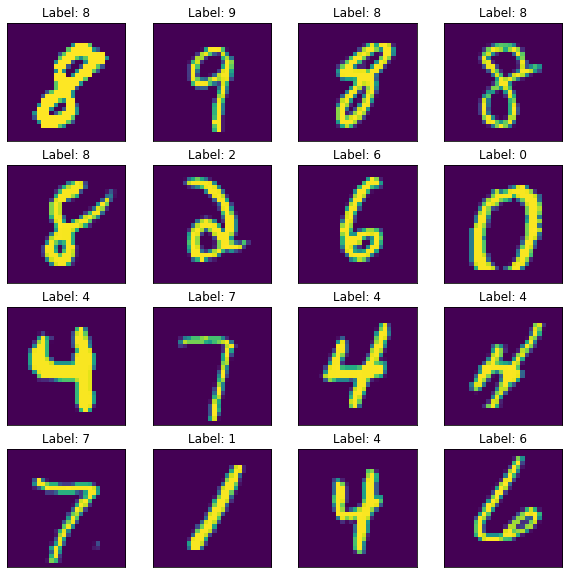

Training set size:  48000
Validation set size:  12000
Testing set size:  10000


In [ ]:
################################################################
# Hyper parameters
################################################################
BATCH_SIZE = 128
transform = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

################################################################
# Create training and testing dataset and show random examples
################################################################
trainval_set = MNISTDataset('mnist_png/training', transform=transform)
trainval_set.show_random()

test_set = MNISTDataset('mnist_png/testing', transform=transform)

################################################################
# As there is no validation set
# We split training dataset into training and validation sets
################################################################
train_size = int(0.8 * len(trainval_set))
val_size = len(trainval_set) - train_size
train_set, val_set = torch.utils.data.random_split(
    dataset=trainval_set,
    lengths=[train_size, val_size],
    generator=torch.Generator().manual_seed(42))

################################################################
# Print lengths of subsets
################################################################
print('Training set size: ', len(train_set))
print('Validation set size: ', len(val_set))
print('Testing set size: ', len(test_set))

################################################################
# Print lengths of subsets
################################################################
train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=BATCH_SIZE,
    shuffle=True)
val_loader = torch.utils.data.DataLoader(
    dataset=val_set,
    batch_size=BATCH_SIZE,
    shuffle=False)
test_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=BATCH_SIZE,
    shuffle=False)

In [5]:
num_classes = 10
learning_rate = 0.001
num_epochs = 100

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [30]:
class LeNet(nn.Module):
    def __init__(self, num_classes):
        super(LeNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(6),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Linear(400, 120)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120, 84)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(84, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.relu(out)
        out = self.fc1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        return out

In [31]:
model = LeNet( num_classes).to(device)

#Defining cost and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)   

In [4]:
# Creating best model path
################################################################
model_dir = "Best_Models"
model_name = "LeNet.pt"
try: 
    if os.path.exists(model_dir) == False:
        os.mkdir(model_dir)
except OSError as error: 
    print(error)
model_path = model_dir+"/"+model_name
################################################################

In [ ]:
################################################################
# Training process
################################################################
start = timer()
best_val_acc = 0
for epoch in range(num_epochs):
  total_loss = 0
  for i, (images, labels) in enumerate(train_loader):  
      images = images.to(device)
      labels = labels.to(device)
          #Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item()
        # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()   
  avg_train_loss = total_loss/len(train_loader.sampler)  
  # evaluating
  with torch.no_grad():
    correct_cnt, total_loss = 0, 0
    for batch_idx, (x, target) in enumerate(val_loader):
        x, target = x.to(device), target.to(device)
        out = model(x)
        _, pred_label = torch.max(out, 1)
        correct_cnt += (pred_label == target).sum()
        # smooth average
        loss = criterion(out, target)
        total_loss += loss.item()
    avg_val_loss = total_loss / len(val_set)
    avg_val_acc = correct_cnt / len(val_set)

  #saving best performing model
  if best_val_acc<avg_val_acc:
    best_val_acc = avg_val_acc
    torch.save(model.state_dict(), model_path)

  print('==>>>LeNet Epoch: {}, train loss: {:.6f}, val loss: {:.6f}, val accuracy: {:.4f}' 
                  .format(epoch, avg_train_loss, avg_val_loss, avg_val_acc))
  print()
print()
print("Best LeNet model saved to "+model_path)
print("Training took: ", timedelta(seconds=timer()-start))

==>>>LeNet Epoch: 0, train loss: 0.01198, val loss: 0.00420, val accuracy: 0.8859

==>>>LeNet Epoch: 1, train loss: 0.00238, val loss: 0.00154, val accuracy: 0.9477

==>>>LeNet Epoch: 2, train loss: 0.00128, val loss: 0.00108, val accuracy: 0.9626

==>>>LeNet Epoch: 3, train loss: 0.00097, val loss: 0.00086, val accuracy: 0.9696

==>>>LeNet Epoch: 4, train loss: 0.00080, val loss: 0.00076, val accuracy: 0.9716

==>>>LeNet Epoch: 5, train loss: 0.00070, val loss: 0.00067, val accuracy: 0.9748

==>>>LeNet Epoch: 6, train loss: 0.00062, val loss: 0.00062, val accuracy: 0.9761

==>>>LeNet Epoch: 7, train loss: 0.00057, val loss: 0.00058, val accuracy: 0.9782

==>>>LeNet Epoch: 8, train loss: 0.00053, val loss: 0.00054, val accuracy: 0.9801

==>>>LeNet Epoch: 9, train loss: 0.00049, val loss: 0.00052, val accuracy: 0.9799

==>>>LeNet Epoch: 10, train loss: 0.00047, val loss: 0.00051, val accuracy: 0.9800

==>>>LeNet Epoch: 11, train loss: 0.00044, val loss: 0.00049, val accuracy: 0.9825

==

In [ ]:
################################################################
#loading the best LeNet model
################################################################
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint)
model.eval()

test_len    = len(test_set)
total_loss  = 0
correct_cnt = 0
#predicting on test data with the best model
with torch.no_grad():
  for batch_idx, (x, target) in enumerate(test_loader):
      x, target = x.to(device), target.to(device)
      out = model(x)
      _, pred_label = torch.max(out, 1)
      correct_cnt += (pred_label == target).sum()
      # smooth average
      loss = criterion(out, target)
      total_loss += loss.item()
  avg_loss = total_loss / test_len
  avg_acc = correct_cnt / test_len

print('==>>> LeNet has test loss: {:.6f}, test accuracy: {:.4f}'.format(avg_loss, avg_acc))

==>>> LeNet has test loss: 0.00027, test accuracy: 0.9890


In [ ]:
# TODO6: Define VGG16 network and train it using above training and testing processes


**TODO6**

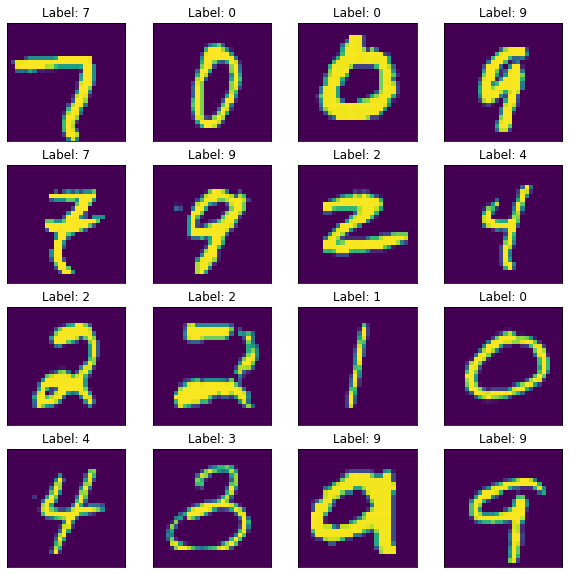

Training set size:  48000
Validation set size:  12000
Testing set size:  10000


In [ ]:
################################################################
# Hyper parameters
################################################################
BATCH_SIZE = 64
transform = transforms.Compose([transforms.Resize((227,227)), transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

################################################################
# Create training and testing dataset and show random examples
################################################################
trainval_set = MNISTDataset('mnist_png/training', transform=transform)
trainval_set.show_random()

test_set = MNISTDataset('mnist_png/testing', transform=transform)

################################################################
# As there is no validation set
# We split training dataset into training and validation sets
################################################################
train_size = int(0.8 * len(trainval_set))
val_size = len(trainval_set) - train_size
train_set, val_set = torch.utils.data.random_split(
    dataset=trainval_set,
    lengths=[train_size, val_size],
    generator=torch.Generator().manual_seed(42))

################################################################
# Print lengths of subsets
################################################################
print('Training set size: ', len(train_set))
print('Validation set size: ', len(val_set))
print('Testing set size: ', len(test_set))

################################################################
# Print lengths of subsets
################################################################
train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=BATCH_SIZE,
    shuffle=True)
val_loader = torch.utils.data.DataLoader(
    dataset=val_set,
    batch_size=BATCH_SIZE,
    shuffle=False)
test_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=BATCH_SIZE,
    shuffle=False)

In [ ]:
class VGG16(nn.Module):
    def __init__(self, num_classes=10):
        super(VGG16, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU())
        self.layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer6 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU())
        self.layer7 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer9 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer10 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.layer11 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer12 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU())
        self.layer13 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.fc = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(7*7*512, 4096),
            nn.ReLU())
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU())
        self.fc2= nn.Sequential(
            nn.Linear(4096, num_classes))
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.layer11(out)
        out = self.layer12(out)
        out = self.layer13(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [ ]:
model = VGG16(num_classes).to(device)
################################################################
#Defining cost and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)   
################################################################
  

In [ ]:
# Best model path
################################################################
model_name = "VGG16.pt"
model_path = model_dir+"/"+model_name
################################################################

In [ ]:
################################################################
# Training process
################################################################
best_val_acc = 0
for epoch in range(num_epochs):
  total_loss = 0
  for i, (images, labels) in enumerate(train_loader):  
      images = images.to(device)
      labels = labels.to(device)
          #Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item()
        # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()   
  avg_train_loss = total_loss/len(train_loader.sampler)  
  # evaluating
  with torch.no_grad():
    correct_cnt, total_loss = 0, 0
    for batch_idx, (x, target) in enumerate(val_loader):
        x, target = x.to(device), target.to(device)
        out = model(x)
        _, pred_label = torch.max(out, 1)
        correct_cnt += (pred_label == target).sum()
        # smooth average
        loss = criterion(out, target)
        total_loss += loss.item()
    avg_val_loss = total_loss / len(val_set)
    avg_val_acc = correct_cnt / len(val_set)

  #saving best performing model
  if best_val_acc<avg_val_acc:
    best_val_acc = avg_val_acc
    torch.save(model.state_dict(), model_path)

  print('==>>> VGG16 Epoch: {}, train loss: {:.6f}, val loss: {:.6f}, val accuracy: {:.4f}' 
                  .format(epoch, avg_train_loss, avg_val_loss, avg_val_acc))
  print()
print()
print("Best VGG16 model saved to "+model_path)

==>>> VGG16 Epoch: 0, train loss: 0.00367, val loss: 0.00082, val accuracy: 0.9828

==>>> VGG16 Epoch: 1, train loss: 0.00077, val loss: 0.00064, val accuracy: 0.9875

==>>> VGG16 Epoch: 2, train loss: 0.00055, val loss: 0.00054, val accuracy: 0.9888

==>>> VGG16 Epoch: 3, train loss: 0.00041, val loss: 0.00049, val accuracy: 0.9908

==>>> VGG16 Epoch: 4, train loss: 0.00033, val loss: 0.00046, val accuracy: 0.9898

==>>> VGG16 Epoch: 5, train loss: 0.00030, val loss: 0.00038, val accuracy: 0.9918

==>>> VGG16 Epoch: 6, train loss: 0.00023, val loss: 0.00035, val accuracy: 0.9938



In [ ]:
################################################################
# Loading the best VGG16 model
################################################################
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint)
model.eval()

test_len    = len(test_set)
total_loss  = 0
correct_cnt = 0
#predicting on test data with the best model
with torch.no_grad():
  for batch_idx, (x, target) in enumerate(test_loader):
      x, target = x.to(device), target.to(device)
      out = model(x)
      _, pred_label = torch.max(out, 1)
      correct_cnt += (pred_label == target).sum()
      # smooth average
      loss = criterion(out, target)
      total_loss += loss.item()
  avg_loss = total_loss / test_len
  avg_acc = correct_cnt / test_len
  
print('==>>> VGG16 has test loss: {:.6f}, test accuracy: {:.4f}'.format(avg_loss, avg_acc))

**TODO7**

In [ ]:
# TODO7: Define Resnet18 network and train it using above training and testing processes


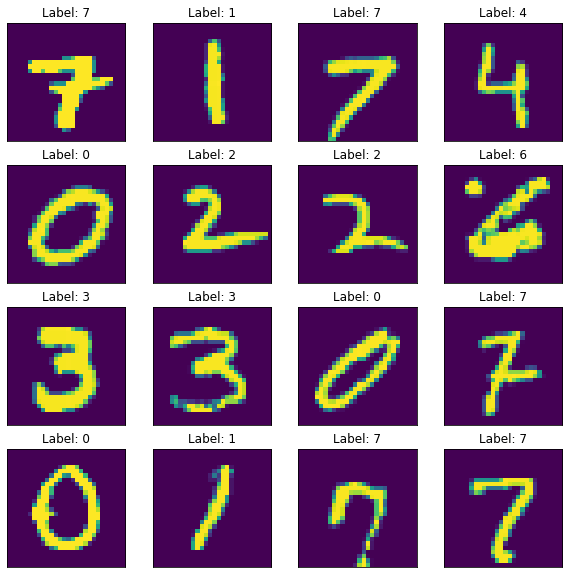

Training set size:  48000
Validation set size:  12000
Testing set size:  10000


In [15]:
################################################################
# Hyper parameters
################################################################
BATCH_SIZE = 64
transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])

################################################################
# Create training and testing dataset and show random examples
################################################################
trainval_set = MNISTDataset('mnist_png/training', transform=transform)
trainval_set.show_random()

test_set = MNISTDataset('mnist_png/testing', transform=transform)

################################################################
# As there is no validation set
# We split training dataset into training and validation sets
################################################################
train_size = int(0.8 * len(trainval_set))
val_size = len(trainval_set) - train_size
train_set, val_set = torch.utils.data.random_split(
    dataset=trainval_set,
    lengths=[train_size, val_size],
    generator=torch.Generator().manual_seed(42))

################################################################
# Print lengths of subsets
################################################################
print('Training set size: ', len(train_set))
print('Validation set size: ', len(val_set))
print('Testing set size: ', len(test_set))

################################################################
# Print lengths of subsets
################################################################
train_loader = torch.utils.data.DataLoader(
    dataset=train_set,
    batch_size=BATCH_SIZE,
    shuffle=True)
val_loader = torch.utils.data.DataLoader(
    dataset=val_set,
    batch_size=BATCH_SIZE,
    shuffle=False)
test_loader = torch.utils.data.DataLoader(
    dataset=test_set,
    batch_size=BATCH_SIZE,
    shuffle=False)

In [16]:
################################################################
#Defining residual block 
################################################################
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Sequential(
                        nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1),
                        nn.BatchNorm2d(out_channels),
                        nn.ReLU())
        self.conv2 = nn.Sequential(
                        nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1),
                        nn.BatchNorm2d(out_channels))
        self.downsample = downsample
        self.relu = nn.ReLU()
        self.out_channels = out_channels
        
    def forward(self, x):
        residual = x
        out = self.conv1(x)
        out = self.conv2(out)
        if self.downsample:
            residual = self.downsample(x)
        out += residual
        out = self.relu(out)
        return out

In [17]:
################################################################
#Defining ResNet network 
################################################################
class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes = 10):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Sequential(
                        nn.Conv2d(1, 64, kernel_size = 7, stride = 2, padding = 3),
                        nn.BatchNorm2d(64),
                        nn.ReLU())
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        self.layer0 = self._make_layer(block, 64, layers[0], stride = 1)
        self.layer1 = self._make_layer(block, 128, layers[1], stride = 2)
        self.layer2 = self._make_layer(block, 256, layers[2], stride = 2)
        self.layer3 = self._make_layer(block, 512, layers[3], stride = 2)
        self.avgpool = nn.AvgPool2d(7, stride=1)
        self.fc = nn.Linear(512, num_classes)
        
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes:
            
            downsample = nn.Sequential(
                nn.Conv2d(self.inplanes, planes, kernel_size=1, stride=stride),
                nn.BatchNorm2d(planes),
            )
        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for i in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)
    
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer0(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x

In [18]:
model = ResNet(ResidualBlock, [2, 2, 2, 2]).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.9)  
#optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.001, momentum = 0.9)  

In [19]:
# Best model path
################################################################
model_name = "ResNet18.pt"
model_path = model_dir+"/"+model_name
################################################################

In [20]:
################################################################
# Training process
################################################################
start = timer()
best_val_acc = 0
for epoch in range(num_epochs):
  total_loss = 0
  for i, (images, labels) in enumerate(train_loader):  
      images = images.to(device)
      labels = labels.to(device)
          #Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item()
        # Backward and optimize
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()   
  avg_train_loss = total_loss/len(train_loader.sampler)  
  # evaluating
  with torch.no_grad():
    correct_cnt, total_loss = 0, 0
    for batch_idx, (x, target) in enumerate(val_loader):
        x, target = x.to(device), target.to(device)
        out = model(x)
        _, pred_label = torch.max(out, 1)
        correct_cnt += (pred_label == target).sum()
        # smooth average
        loss = criterion(out, target)
        total_loss += loss.item()
    avg_val_loss = total_loss / len(val_set)
    avg_val_acc = correct_cnt / len(val_set)

  #saving best performing model
  if best_val_acc<avg_val_acc:
    best_val_acc = avg_val_acc
    torch.save(model.state_dict(), model_path)

  print('==>>> ResNet18 Epoch: {}, train loss: {:.6f}, val loss: {:.6f}, val accuracy: {:.4f}' 
                  .format(epoch, avg_train_loss, avg_val_loss, avg_val_acc))
  print()
print()
print("Best ResNet18 model saved to "+model_path)
print("Training took: ", timedelta(seconds=timer()-start))

==>>> ResNet18 Epoch: 0, train loss: 0.00469, val loss: 0.00098, val accuracy: 0.9833

==>>> ResNet18 Epoch: 1, train loss: 0.00078, val loss: 0.00064, val accuracy: 0.9891

==>>> ResNet18 Epoch: 2, train loss: 0.00048, val loss: 0.00053, val accuracy: 0.9898

==>>> ResNet18 Epoch: 3, train loss: 0.00034, val loss: 0.00044, val accuracy: 0.9914

==>>> ResNet18 Epoch: 4, train loss: 0.00025, val loss: 0.00042, val accuracy: 0.9916

==>>> ResNet18 Epoch: 5, train loss: 0.00018, val loss: 0.00040, val accuracy: 0.9929

==>>> ResNet18 Epoch: 6, train loss: 0.00013, val loss: 0.00037, val accuracy: 0.9926

==>>> ResNet18 Epoch: 7, train loss: 0.00009, val loss: 0.00038, val accuracy: 0.9928

==>>> ResNet18 Epoch: 8, train loss: 0.00007, val loss: 0.00034, val accuracy: 0.9933

==>>> ResNet18 Epoch: 9, train loss: 0.00005, val loss: 0.00032, val accuracy: 0.9933

==>>> ResNet18 Epoch: 10, train loss: 0.00003, val loss: 0.00031, val accuracy: 0.9937

==>>> ResNet18 Epoch: 11, train loss: 0.00

In [21]:
################################################################
#loading the best ResNet model
################################################################
checkpoint = torch.load(model_path)
model.load_state_dict(checkpoint)
model.eval()

test_len    = len(test_set)
total_loss  = 0
correct_cnt = 0
#predicting on test data with the best model
with torch.no_grad():
  for batch_idx, (x, target) in enumerate(test_loader):
      x, target = x.to(device), target.to(device)
      out = model(x)
      _, pred_label = torch.max(out, 1)
      correct_cnt += (pred_label == target).sum()
      # smooth average
      loss = criterion(out, target)
      total_loss += loss.item()
  avg_loss = total_loss / test_len
  avg_acc = correct_cnt / test_len

print('==>>> ResNet18 has test loss: {:.5f}, test accuracy: {:.4f}'.format(avg_loss, avg_acc))

==>>> ResNet18 has test loss: 0.00027, test accuracy: 0.9944
